In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

import nltk
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

import pickle

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [2]:
soc_df = pandas.read_pickle(r'C:\Users\timothyelder\Documents\final_project\soc_data\soc_df.pk1')

In [3]:
soc_df['tokenized_text'] = soc_df['contents'].apply(lambda x: nltk.word_tokenize(x))

soc_df['word_counts'] = soc_df['tokenized_text'].apply(lambda x: len(x))

In [4]:
#creates one big long string of all the tokenized text
socTokens = nltk.word_tokenize(soc_df['contents'].sum())

In [5]:
socTokens

['Confidential',
 'business',
 'information',
 '(',
 'CBI',
 ')',
 'is',
 'a',
 'necessary',
 'tool',
 'to',
 'protect',
 'commercial',
 'interests',
 'in',
 'the',
 'rapidly',
 'developing',
 'field',
 'of',
 'gene',
 'technology',
 '.',
 'CBI',
 'is',
 'also',
 'often',
 'claimed',
 'for',
 'documentation',
 'and',
 'materials',
 'supporting',
 'the',
 'biosafety',
 'assessments',
 'of',
 'genetically',
 'modified',
 'organisms',
 '(',
 'GMOs',
 ')',
 'intended',
 'for',
 'environmental',
 'release',
 ',',
 'food',
 ',',
 'and',
 'feed',
 'use',
 '.',
 'However',
 ',',
 'such',
 'claims',
 'oftentimes',
 'marginally',
 'serve',
 'their',
 'legitimate',
 'purpose',
 'to',
 'protect',
 'commercial',
 'interests',
 'and',
 'unnecessarily',
 'limit',
 'transparency',
 'and',
 'public',
 'peer',
 'review',
 'of',
 'data',
 'submitted',
 'to',
 'regulatory',
 'authorities',
 '.',
 'CBI',
 'and',
 'proprietary',
 'claims',
 'also',
 'restrict',
 'access',
 'to',
 'transgene',
 'sequence',
 

In [5]:
#convert the tokens into a text object to do some of the 
#basic corpus linguistics
socText = nltk.Text(socTokens)

In [7]:
# defines a wordcounting function, 
#requires single string as input, which is the above 
#text object
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [8]:
wordCounter(socTokens)

,count,word
0,2,confidential
1,39,business
2,942,information
3,6603,(
4,3,cbi
5,6688,)
6,8617,is
7,11133,a
8,104,necessary
9,78,tool


In [9]:
#shows concordance with a given word
socIndex = nltk.text.ConcordanceIndex(socText) 
socIndex.print_concordance('sociology')

Displaying 25 of 35 matches:
ny different fields ranging from sociology and economics to computer scienc
verse as mathematics , physics , sociology and , most especially , biology 
bject of significant interest in sociology . This topic is especially relev
ging from biology to economics , sociology , and even theology [ 1 ] . The 
onships – have a long history in sociology , their use in health surveys is
ots in economics [ 1 ] , [ 2 ] , sociology [ 3 ] – [ 5 ] , urban planning a
e broadly used in psychology and sociology as they are crucial in understan
ion [ 3 ] – [ 5 ] . Quantitative sociology then becomes boosted and enhance
logy , evolutionary psychology , sociology and economics.Malaria remains a 
information technology [ 3 ] and sociology [ 4 ] , [ 5 ] . Further developm
 ] , [ 2 ] . From mathematics to sociology , his Hierarchy of the Sciences 
problem in many disciplines from sociology , computer science to biology [ 
ties . Disciplines as diverse as sociology , economics , ps

In [10]:
#frequency distribution of the words in the article contents
words = [word.lower() for word in socText]
freq = nltk.FreqDist(words)
print (freq['sociology']) #prints the number of times the word occurs


36


In [11]:
#prints out some collocations
socText.collocations()

United States; public health; World Health; Health Organization;
physical activity; mental health; health care; risk factors; sub-
Saharan Africa; social networks; recent years; leading cause;
developing countries; social media; million people; sexually
transmitted; climate change; wide range; life expectancy; middle-
income countries


In [12]:
#prints words which occur with a given word
socText.common_contexts(['social'])

and_media through_networks ._learning via_learning through_media
from_media a_media makes_media high-profile_media by_networks
in_networks online_media of_networks the_function where_norms
in_dilemmas in_animals as_security of_evolution in_traits


In [13]:
#simply counts the number of times a given word occurs 
socText.count('cell')

62

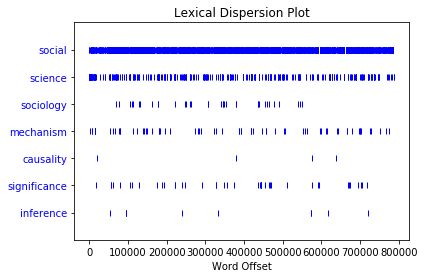

In [14]:
#plots the number of times a word occurs 
sns.reset_orig() #Seaborn messes with this plot, disabling it
socText.dispersion_plot(['social','science', 'sociology', 'mechanism' ,'causality', 'significance', 'inference'])
sns.set() #Re-enabling seaborn

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [5]:
#generates a stop list to filter the corpus
countsDict = {}
for word in soc_df['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[(',', 40279),
 ('the', 27266),
 ('of', 26690),
 ('.', 25602),
 (']', 23842),
 ('[', 23840),
 ('and', 23155),
 ('to', 15547),
 ('in', 15486),
 ('a', 10591),
 ('is', 8600),
 (')', 6688),
 ('(', 6603),
 ('that', 6109),
 ('as', 5452),
 ('for', 5446),
 ('are', 5280),
 ('with', 5248),
 ('1', 4455),
 ('have', 3752),
 ('on', 3625),
 ('by', 3405),
 ('or', 3328),
 ('2', 3320),
 ('has', 3266),
 ('The', 2947),
 ('be', 2860),
 ('health', 2787),
 ('social', 2725),
 ('an', 2719),
 ('3', 2668),
 ('from', 2632),
 ('been', 2552),
 ('%', 2382),
 ('4', 2258),
 ('In', 2256),
 ('their', 2090),
 ('5', 1989),
 ('such', 1945),
 ('which', 1926),
 ('can', 1879),
 ('this', 1862),
 ('’', 1815),
 ('more', 1689),
 ('6', 1645),
 ('not', 1542),
 ('at', 1528),
 ('–', 1438),
 ('it', 1434),
 ('people', 1418)]

In [6]:
#sets stop list to begin after 'health'
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'health':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

'are'

In [7]:
#creates a function for normalizing the tokens
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

soc_df['normalized_tokens'] = soc_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

soc_df['normalized_tokens_count'] = soc_df['normalized_tokens'].apply(lambda x: len(x))

soc_df

,contents,discipline,subjects,titles,year_publish,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,Confidential business information (CBI) is a n...,sociology,"[perspective, biotechnology, biology, bioethic...",Biosafety Data as Confidential Business Inform...,2013,"[Confidential, business, information, (, CBI, ...",203,"[confidenti, busi, inform, cbi, necessari, too...",112
1,The scientific examination of how research is ...,sociology,"[mathematics, drug discovery, biology and life...",Meta-Research: Broadening the Scope of PLOS Bi...,2016,"[The, scientific, examination, of, how, resear...",53,"[scientif, examin, research, design, carri, co...",25
2,Both the scientific community and the general ...,sociology,"[biology and life sciences, community page, le...",Science Educational Outreach Programs That Ben...,2016,"[Both, the, scientific, community, and, the, g...",222,"[scientif, commun, gener, public, stand, benef...",110
3,Cooperative interactions between species (here...,sociology,"[plants, animals, plant physiology, plant scie...",Temporal Structure in Cooperative Interactions...,2016,"[Cooperative, interactions, between, species, ...",119,"[cooper, interact, speci, hereaft, mutual, ubi...",53
4,"In the past 20 years, the internet and social ...",sociology,"[social networks, social communication, scient...",A Guide to Scientific Crowdfunding,2016,"[In, the, past, 20, years, ,, the, internet, a...",246,"[past, year, internet, social, media, brought,...",123
5,"Recent, extensive meta-analysis of over a deca...",sociology,"[lectures, biology and life sciences, universi...",Peer-Led Team Learning Helps Minority Students...,2016,"[Recent, ,, extensive, meta-analysis, of, over...",108,"[recent, extens, decad, educ, research, ha, re...",57
6,"In the environmental sciences, the scientific ...",sociology,"[social communication, open science, perspecti...",Conservation Research Is Not Happening Where I...,2016,"[In, the, environmental, sciences, ,, the, sci...",66,"[environment, scienc, scientif, process, gener...",32
7,Data are the foundation of the scientific meth...,sociology,"[perspective, biology and life sciences, popul...",Gauging the Purported Costs of Public Data Arc...,2016,"[Data, are, the, foundation, of, the, scientif...",175,"[data, foundat, scientif, method, yet, individ...",90
8,“Plan for what is difficult while it is easy; ...,sociology,"[seeds, perspective, criminology, plant scienc...",Farewell to the Lose–Lose Reality of Policing ...,2016,"[“, Plan, for, what, is, difficult, while, it,...",27,"[plan, difficult, easi, great, tzu, art, war]",7
9,Stephen Jay Gould famously used the work of Sa...,sociology,"[africans, racial discrimination, musculoskele...","Morton, Gould, and Bias: A Comment on “The Mis...",2016,"[Stephen, Jay, Gould, famously, used, the, wor...",159,"[stephen, jay, gould, famous, use, work, samue...",85


In [8]:
#saves data frames 
#soc_df.to_pickle(r'C:\Users\timothyelder\Documents\final_project\soc_data\normalized_soc_df.pk1') #saves
#loads dataframe
soc_df = pandas.read_pickle(r'C:\Users\timothyelder\Documents\final_project\soc_data\normalized_soc_df.pk1')

In [9]:
#conditional frequency

#.sum() adds together the lists from each row into a single list
soc_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in soc_df['normalized_tokens'].sum()))

#print the number of words
print(soc_cfdist.N())

376801


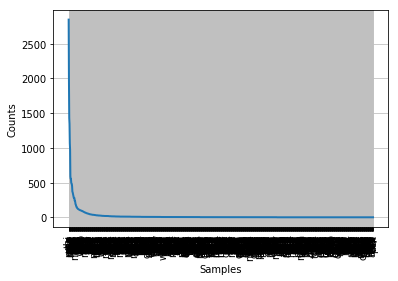

In [10]:
#plots the frequency of three letter words
soc_cfdist[3].plot()

In [11]:
#creating a probability distribution using the conditional frequency distribution 

soc_cpdist = nltk.ConditionalProbDist(soc_cfdist, nltk.ELEProbDist)

#print the most common n-th letter word
print(soc_cpdist[7].max())

#And its probability
print(soc_cpdist[7].prob(soc_cpdist[7].max()))

increas
0.0311699100341128


In [12]:
#parses text and applies POS tags, appends to DF
soc_df['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in soc_df['normalized_tokens']]

In [13]:
#conditional frequency distribution using the POS tags 
soc_cfdist_WordtoPOS = nltk.ConditionalFreqDist(soc_df['normalized_tokens_POS'].sum())
list(soc_cfdist_WordtoPOS.items())[:10]

[('confidenti', FreqDist({'JJ': 1, 'NN': 7})),
 ('busi', FreqDist({'IN': 1, 'JJ': 10, 'NN': 34, 'NNS': 1, 'RB': 2, 'VB': 1})),
 ('inform', FreqDist({'FW': 1, 'JJ': 99, 'NN': 973, 'VB': 40, 'VBP': 12})),
 ('cbi', FreqDist({'NN': 3})),
 ('necessari',
  FreqDist({'CC': 1,
            'FW': 4,
            'IN': 4,
            'JJ': 59,
            'NN': 23,
            'NNS': 1,
            'RB': 9,
            'VB': 5})),
 ('tool', FreqDist({'JJ': 2, 'NN': 179})),
 ('protect', FreqDist({'JJ': 37, 'NN': 70, 'VB': 7, 'VBP': 111})),
 ('commerci', FreqDist({'JJ': 12, 'NN': 42, 'NNS': 1, 'VB': 2, 'VBP': 4})),
 ('interest', FreqDist({'NN': 433})),
 ('rapidli',
  FreqDist({'JJ': 14, 'NN': 87, 'NNS': 1, 'VBN': 1, 'VBP': 15, 'VBZ': 3}))]

In [14]:
#this can be used to findout what a word looks like 
#after it is run through the porter stemmer
#will help guide analysis
porter = nltk.stem.porter.PorterStemmer()
print (porter.stem('causality'))

causal


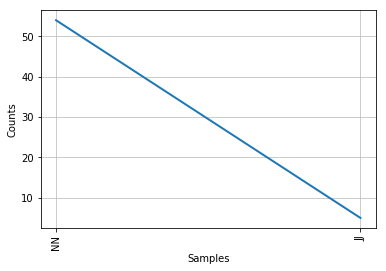

In [15]:
soc_cfdist_WordtoPOS['causal'].plot()

In [16]:
#gives the frequency of each part of speech for each 
#word
soc_cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in soc_df['normalized_tokens_POS'].sum())

In [17]:
#prints all the nouns 
soc_cfdist_POStoWord['NNS'].most_common(5)

[('diseas', 1143),
 ('women', 1100),
 ('children', 1099),
 ('data', 836),
 ('increas', 719)]

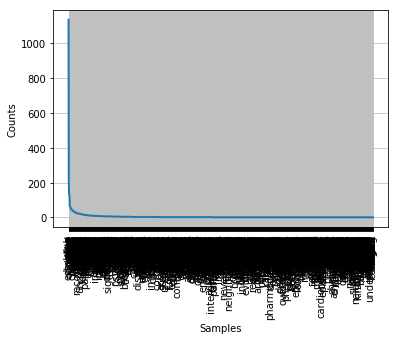

In [19]:
#plots the base form verbs against number of occurences
soc_cfdist_POStoWord['VB'].plot()

In [21]:
soc_cpdist_POStoWord = nltk.ConditionalProbDist(soc_cfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(soc_cpdist_POStoWord['VB'].max())

#And its probability
print(soc_cpdist_POStoWord['VB'].prob(soc_cpdist_POStoWord['NN'].max()))

develop
7.133685261806249e-05


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [22]:
#finds the bigram collocations
socBigrams = nltk.collocations.BigramCollocationFinder.from_words(soc_df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(socBigrams.N))

There are 376801 bigrams in the finder


In [23]:
#function for Bigram scoring to comapre bigrams. 
def bigramScoring(count, wordsTuple, total):
    return count

print(socBigrams.nbest(bigramScoring, 10))

[('public', 'health'), ('social', 'network'), ('risk', 'factor'), ('unit', 'state'), ('mental', 'health'), ('health', 'care'), ('develop', 'countri'), ('physic', 'activ'), ('health', 'problem'), ('world', 'health')]


In [27]:
#these are for measuring whether or not the bigrams 
#are occuring by chance. The second line of code 
#the measure can be changed. 

bigram_measures = nltk.collocations.BigramAssocMeasures()

socBigrams.score_ngrams(bigram_measures.student_t)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('public', 'health'), 20.67186220071805),
 (('social', 'network'), 18.93483695691694),
 (('risk', 'factor'), 16.75860892907811),
 (('unit', 'state'), 16.65890095314977),
 (('mental', 'health'), 15.868219534575397),
 (('health', 'care'), 15.367609967504421),
 (('physic', 'activ'), 14.450481887711979),
 (('develop', 'countri'), 14.320338319877408),
 (('health', 'problem'), 14.027228085895663),
 (('world', 'health'), 13.7070340215158),
 (('hiv', 'infect'), 13.131890917279176),
 (('health', 'organ'), 13.049955157533278),
 (('et', 'al'), 12.955214068386404),
 (('increas', 'risk'), 12.756935768153616),
 (('ha', 'shown'), 12.666430259351417),
 (('million', 'peopl'), 12.635515684795115),
 (('social', 'media'), 12.487643803849839),
 (('recent', 'year'), 12.072850773855286),
 (('ha', 'becom'), 11.822591777452258),
 (('age', 'year'), 11.649344835794658),
 (('lead', 'caus'), 11.523144434500933),
 (('qualiti', 'life'), 11.493192792350001),
 (('research', 'ha'), 11.423255625963167),
 (('cardiovasc

In [29]:
#these are all the different measures that can be 
#used above. 
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

In [30]:
#gives trigrams
trigram_measures = nltk.collocations.TrigramAssocMeasures()
socTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(soc_df['normalized_tokens'].sum())
socTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('world', 'health', 'organ'), 13.22800829918733),
 (('public', 'health', 'problem'), 9.847298035006537),
 (('lead', 'caus', 'death'), 7.937007165100739),
 (('sexual', 'transmit', 'infect'), 7.615708079170604),
 (('men', 'sex', 'men'), 7.615636576358913),
 (('major', 'public', 'health'), 7.5480887872870985),
 (('intim', 'partner', 'violenc'), 7.3484548926888476),
 (('sex', 'men', 'msm'), 7.280060906163946),
 (('play', 'import', 'role'), 7.27994020869574),
 (('bodi', 'mass', 'index'), 7.211097172685062),
 (('transmit', 'infect', 'sti'), 7.071057573336931),
 (('onlin', 'social', 'network'), 6.998698236626232),
 (('millennium', 'develop', 'goal'), 6.633226404868951),
 (('peopl', 'live', 'hiv'), 6.632112652784205),
 (('public', 'health', 'concern'), 6.632037847835144),
 (('new', 'hiv', 'infect'), 6.480187035414232),
 (('mental', 'health', 'problem'), 6.47934948964326),
 (('femal', 'sex', 'worker'), 6.324516496613021),
 (('neglect', 'tropic', 'diseas'), 6.244985482078288),
 (('mass', 'inde

In [32]:
#gives n-grams for given number n 
Ngrams = nltk.ngrams(soc_df['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('genet', 'modifi', 'organ', 'gmo'): 2, ('scientif', 'commun', 'gener', 'public'): 2, ('nation', 'scienc', 'foundat', 'nsf'): 2, ('scienc', 'technolog', 'engin', 'mathemat'): 16, ('technolog', 'engin', 'mathemat', 'stem'): 11, ('thi', 'perspect', 'part', 'public'): 2, ('perspect', 'part', 'public', 'engag'): 2, ('part', 'public', 'engag', 'scienc'): 2, ('public', 'engag', 'scienc', 'seri'): 2, ('open', 'access', 'open', 'data'): 2, ('scienc', 'technolog', 'engin', 'math'): 6, ('technolog', 'engin', 'math', 'stem'): 4, ('massiv', 'open', 'onlin', 'cours'): 4, ('open', 'onlin', 'cours', 'mooc'): 3, ('student', 'use', 'openstax', 'textbook'): 2, ('nation', 'institut', 'health', 'nih'): 6, ('unit', 'state', 'food', 'drug'): 2, ('state', 'food', 'drug', 'administr'): 2, ('research', 'develop', 'r', 'cost'): 2, ('next', 'gener', 'scienc', 'standard'): 2, ('ha', 'becom', 'increasingli', 'popular'): 5, ('becom', 'increasingli', 'popular', 'recent'): 2, ('increasingli', 'popular', 'recent', 'y

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

In [2]:
#loads sociology dataframe
soc_df = pandas.read_pickle(r'C:\Users\timothyelder\Documents\final_project\soc_data\normalized_soc_df.pk1')

#loads sociobiology dataframe
soc_bio_df = pandas.read_pickle(r'C:\Users\timothyelder\Documents\final_project\soc_data\soc_bio_df.pk1')

#loads social psych dataframe
soc_psych_df = pandas.read_pickle(r'C:\Users\timothyelder\Documents\final_project\soc_data\soc_psych_df.pk1')

#loads dataframe
anthro_df = pandas.read_pickle(r'C:\Users\timothyelder\Documents\final_project\anthro_data\normalized_anthro_df.pk1')



# Need to stem and remove stop words before the comparisons can be made, for the social psych and sociobiology corpora 

In [8]:
soc_psych_df['tokenized_text'] = soc_psych_df['contents'].apply(lambda x: nltk.word_tokenize(x))
soc_psych_df['normalized_tokens'] = soc_psych_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

soc_bio_df['tokenized_text'] = soc_bio_df['contents'].apply(lambda x: nltk.word_tokenize(x))
soc_bio_df['normalized_tokens'] = soc_bio_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

This cell below takes the two collection of words and removes the words not found in both and assigns those remaining indices

In [3]:
socWords = set(soc_df['normalized_tokens'].sum())
anthroWords = set(anthro_df['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = socWords & anthroWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['causal']

2855

In [11]:
#defines a function for making a probability array of 
#word occurences across the corpora
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

In [12]:
socProbArray = makeProbsArray(soc_df['normalized_tokens'], overlapWordsDict)
anthroProbArray = makeProbsArray(anthro_df['normalized_tokens'], overlapWordsDict)
anthroProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

1.0

In [14]:
#KL divergence 
soc_anthroDivergence = scipy.stats.entropy(socProbArray, anthroProbArray)
print (soc_anthroDivergence)
anthro_socDivergence = scipy.stats.entropy(anthroProbArray, socProbArray)
print (anthro_socDivergence)

0.17005842511699723
0.20845498954981284


In [15]:
#elementwise calculation for determing which words best 
#distinguish the corpora
soc_anthroDivergence_ew = scipy.special.kl_div(socProbArray, anthroProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = soc_anthroDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,entrain,1.104404e-06
1,flavivirida,3.732337e-06
2,spectacular,7.464673e-06
3,sharpli,1.255388e-09
4,billi,3.732337e-06
5,chemic,6.692632e-07
6,fusion,4.970218e-08
7,stipul,7.464673e-06
8,actor,2.233487e-06
9,ka,2.949229e-04


In [16]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
5976,network,0.003591
419,health,0.001363
2372,human,0.001348
549,social,0.001345
1883,hominin,0.001079
4442,media,0.000993
1577,violenc,0.000937
4493,site,0.000821
5746,cultur,0.000817
3193,node,0.000802


In [17]:
#functions for calculating divergence and distances 
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [18]:
Divergence(soc_df, anthro_df, )

0.0